In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import classification_report
from termcolor import colored

Ucitavanje i analiza skupa podataka:

In [3]:
data = pd.read_csv("/home/ivana/Desktop/IP-projekat/2023_Data_Mining_Smoking_Dataset/datasets/data1.csv")
data.columns

Index(['Unnamed: 0', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar',
       'smoking'],
      dtype='object')

In [4]:
data.drop('Unnamed: 0', axis=1,inplace=True)

In [5]:
data.shape

(55692, 25)

In [6]:
data.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0


Analiza ulaznih atributa i podela na test i trening skup:

In [7]:
Y = data['smoking']
X = data.drop('smoking', axis=1)
feature_names = X.columns
X.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y, random_state=12)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit_transform(X_train)

array([[ 0.06123489, -0.71402853, -0.05347329, -0.13188526,  0.07796043,
         0.03819137],
       [ 0.04894811, -0.72601615, -0.05794324, -0.09326507, -0.01246133,
         0.1343437 ],
       [-0.47623149,  0.05449263, -0.38971533, -0.04631699,  0.07474894,
        -0.1325214 ],
       ...,
       [ 0.86695188, -0.03875523,  0.06192799, -0.12151721, -0.00666959,
         0.15965862],
       [-0.516993  ,  0.03300804, -0.38672836, -0.16773877,  0.14402439,
         0.06022634],
       [-0.49750933,  0.0338846 , -0.39447794,  0.02908568, -0.07263208,
         0.00331055]])

In [14]:
def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Izvestaj o klasifikaciji za model{} nad {} podacima".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Matrica konfuzije za model {} nad {} podacima ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['1', '0'], index=['1', '0']))
    print("---------------------------------------------------------------------------------")
    

In [15]:
def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(20, 12))
    plot_tree(model, class_names=['1', '0'], feature_names=feature_names, filled=True)
    plt.title("Stablo odlucivanja dubine{} sa {} cvorova".format(model.get_depth(), model.get_n_leaves()))

    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parametri modela {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("---------------------------------------------------------------------------------")


In [16]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train) # treninranje modela

DecisionTreeClassifier()

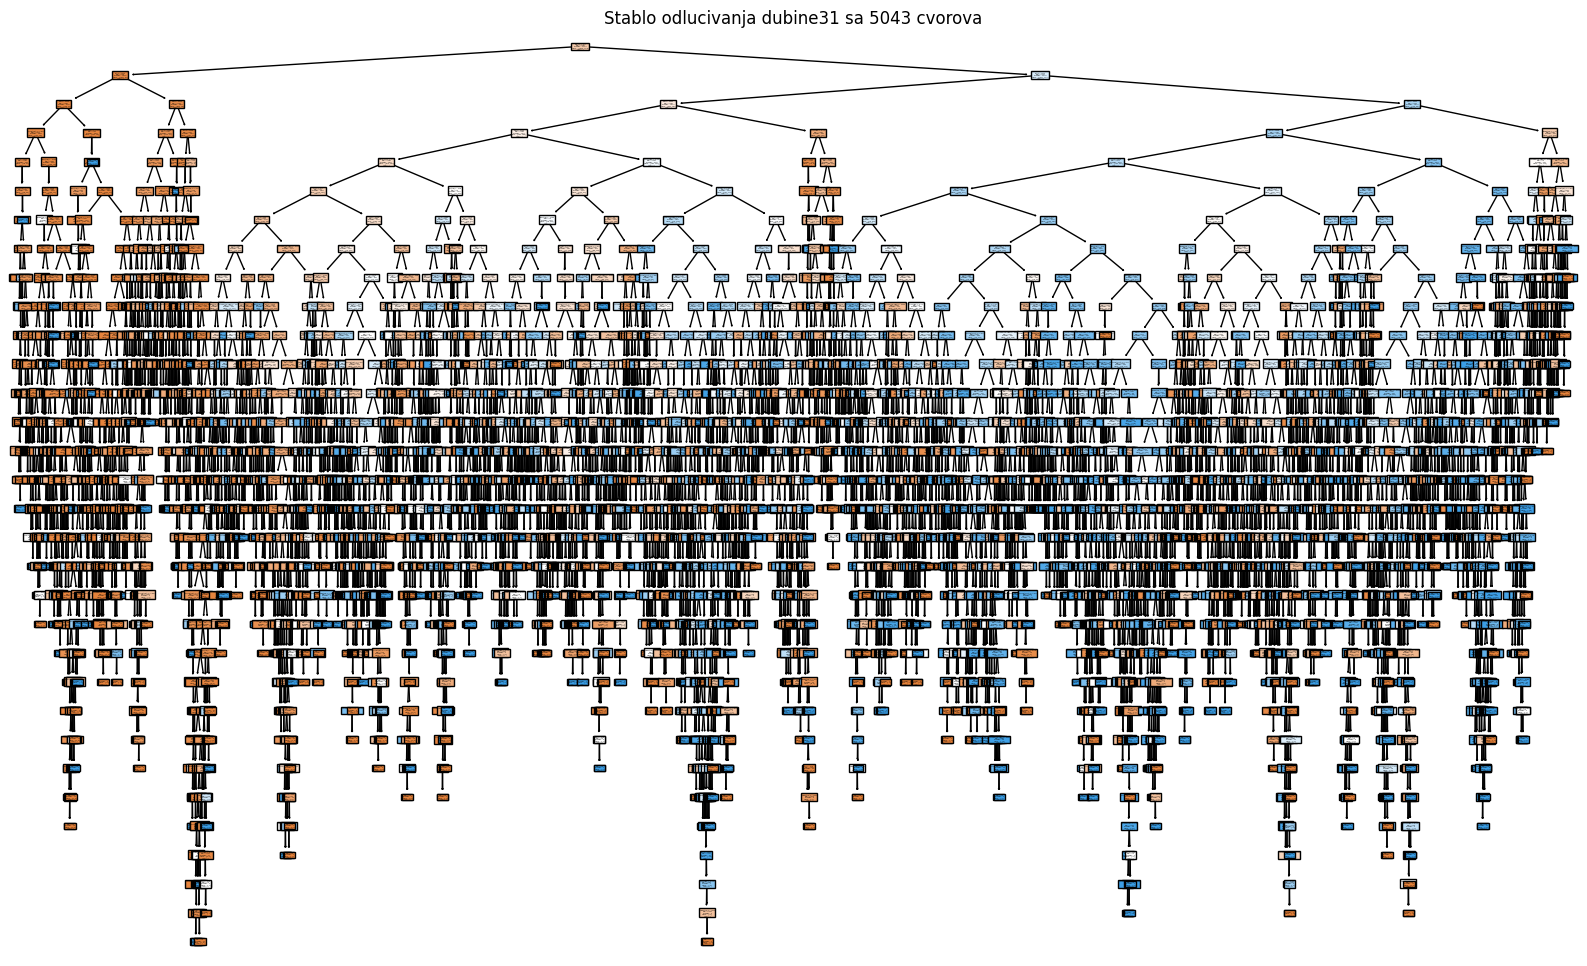

---------------------------------------------------------------------------------
Parametri modela DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [17]:
plot_decision_tree(dtc, feature_names)

Mozemo prikazati koji atributi su bili od najveceg znacaja prilikom formiranja stabla. 

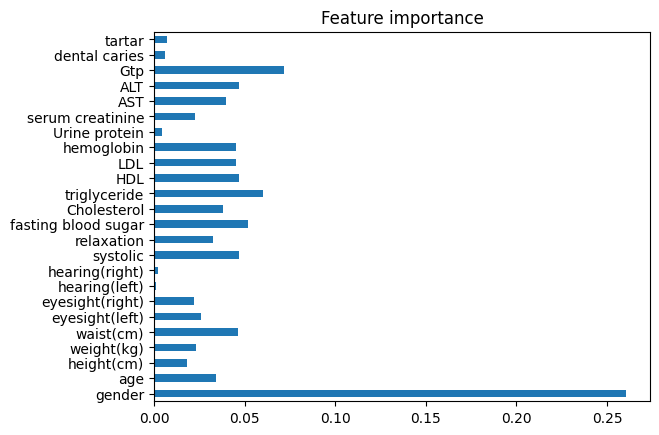

In [18]:
pd.Series(dtc.feature_importances_, index=X.columns).plot.barh()
plt.title("Feature importance")
plt.show()

Vidimo da nam hearing(right) i hearing(left) imaju vrlo mali znacaj prilikom formiranja stabla. Odmah za njima je i atribut Urine proteine.

In [19]:
report(dtc, X_train, Y_train)

Izvestaj o klasifikaciji za modelDecisionTreeClassifier nad training podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23608
           1       1.00      1.00      1.00     13705

    accuracy                           1.00     37313
   macro avg       1.00      1.00      1.00     37313
weighted avg       1.00      1.00      1.00     37313

---------------------------------------------------------------------------------
Matrica konfuzije za model DecisionTreeClassifier nad training podacima 
---------------------------------------------------------------------------------
       1      0
1  23608      0
0      0  13705
---------------------------------------------------------------------------------


f1-score nam je 1. Mozemo zakljuciti da se model preprilagodio.

In [20]:
report(dtc, X_test, Y_test, "test")

Izvestaj o klasifikaciji za modelDecisionTreeClassifier nad test podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.82      0.82     11629
           1       0.69      0.70      0.70      6750

    accuracy                           0.78     18379
   macro avg       0.76      0.76      0.76     18379
weighted avg       0.78      0.78      0.78     18379

---------------------------------------------------------------------------------
Matrica konfuzije za model DecisionTreeClassifier nad test podacima 
---------------------------------------------------------------------------------
      1     0
1  9519  2110
0  2007  4743
---------------------------------------------------------------------------------


Probajmo sa podesavanjem hiperparametara.

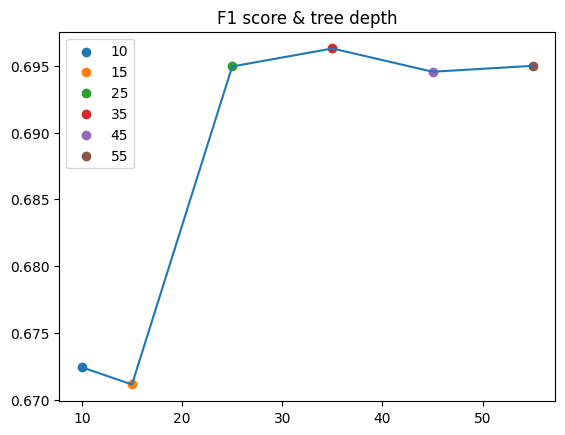

[0.6724186307519641, 0.6711340957098114, 0.6949489008161166, 0.6962973846605935, 0.694555112881806, 0.6949988951903956]


In [21]:
from sklearn.metrics import f1_score
model_f1 = []
depth_values = [10,15,25,35, 45, 55]

for depth in depth_values:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, Y_train) # treniramo model
    y_pred = model.predict(X_test) #evaluiramo
    model_f1.append(f1_score(Y_test, y_pred))

#plt.plot(model_acc)
for d, acc in zip(depth_values, model_f1):
    plt.scatter(d, acc, label=d)
    
plt.plot(depth_values, model_f1)
plt.legend()
plt.title("F1 score & tree depth")
plt.show()
print(model_f1)

Zakljucujemo na osnovu f1-score da je najbolja dubina 35.

Mera necistoce:

In [22]:
from sklearn.model_selection import GridSearchCV

params = {"max_depth": [10,15,25,35,45],                                                      
    "min_samples_leaf": [10,15,20,30,40],
    'criterion':['gini','entropy'],
    'min_samples_split':[2,4,6],
         }

In [52]:
estimator = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,
                          return_train_score=True)

In [53]:
estimator.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 25, 35, 45],
                         'min_samples_leaf': [10, 15, 20, 30, 40],
                         'min_samples_split': [2, 4, 6]},
             return_train_score=True, scoring='accuracy')

In [54]:
estimator.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 15,
 'min_samples_split': 4}

In [55]:
estimator.best_score_

0.7446198781495187

Vidimo da je najbolja kombinacija parametara gini i dubina 10, kao i da je najbolji score 0.74.

In [56]:
report(estimator.best_estimator_, X_train, Y_train)

Izvestaj o klasifikaciji za modelDecisionTreeClassifier nad training podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.80      0.82     23608
           1       0.68      0.75      0.71     13705

    accuracy                           0.78     37313
   macro avg       0.76      0.77      0.77     37313
weighted avg       0.79      0.78      0.78     37313

---------------------------------------------------------------------------------
Matrica konfuzije za model DecisionTreeClassifier nad training podacima 
---------------------------------------------------------------------------------
       1      0
1  18816   4792
0   3428  10277
---------------------------------------------------------------------------------


In [57]:
report(estimator.best_estimator_, X_test, Y_test, "test")

Izvestaj o klasifikaciji za modelDecisionTreeClassifier nad test podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.77      0.79     11629
           1       0.64      0.70      0.67      6750

    accuracy                           0.75     18379
   macro avg       0.73      0.74      0.73     18379
weighted avg       0.75      0.75      0.75     18379

---------------------------------------------------------------------------------
Matrica konfuzije za model DecisionTreeClassifier nad test podacima 
---------------------------------------------------------------------------------
      1     0
1  8947  2682
0  2004  4746
---------------------------------------------------------------------------------


Vidimo da je f1-score na trening skupu 82%, dok je na test skupu 79%.

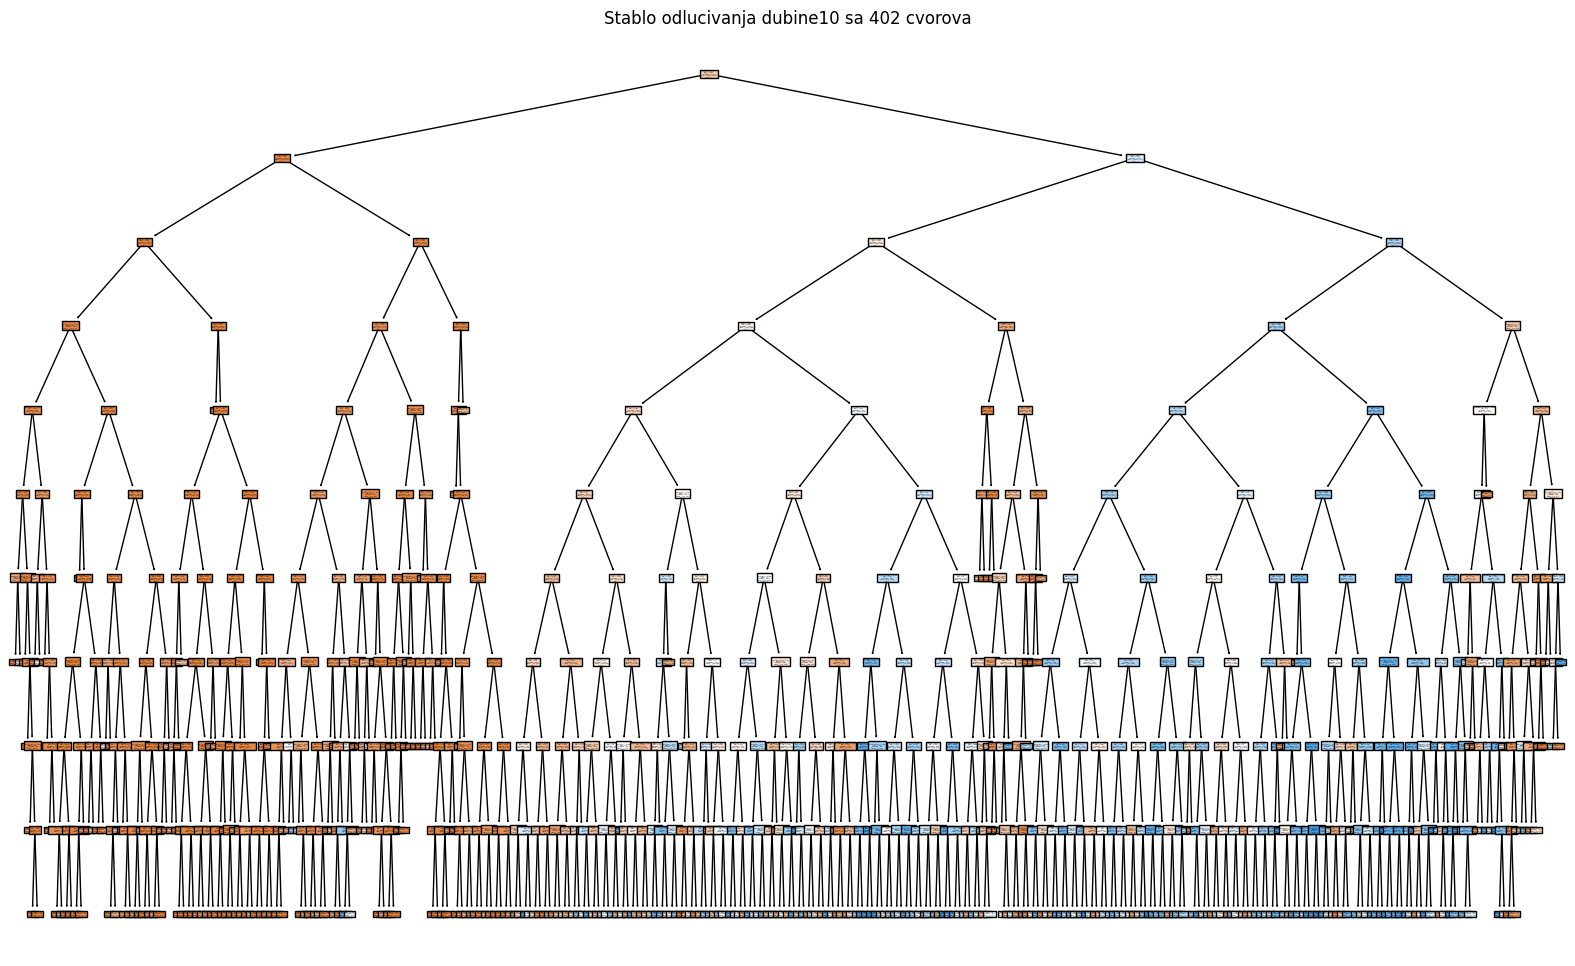

---------------------------------------------------------------------------------
Parametri modela DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth 10
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 15
min_samples_split 4
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [29]:
plot_decision_tree(estimator.best_estimator_, feature_names)

Detaljni prikaz validacije:

In [26]:
estimator.cv_results_

{'mean_fit_time': array([0.29199743, 0.35623593, 0.31739841, 0.28841858, 0.30991569,
        0.2881918 , 0.27099538, 0.26984558, 0.26940112, 0.26332636,
        0.26507607, 0.26936765, 0.26240587, 0.26446099, 0.26296353,
        0.34642205, 0.348279  , 0.35065737, 0.33764682, 0.33698449,
        0.33491111, 0.32602792, 0.33847899, 0.34726577, 0.33688364,
        0.31203337, 0.31029749, 0.30151677, 0.30131755, 0.3286509 ,
        0.3752491 , 0.38484049, 0.39569564, 0.36436272, 0.37579131,
        0.35821395, 0.33775244, 0.35916891, 0.35785999, 0.34575739,
        0.34367161, 0.33738976, 0.32339325, 0.30616217, 0.30582519,
        0.37174015, 0.36817055, 0.42735004, 0.36135077, 0.35345378,
        0.3543345 , 0.3351851 , 0.33325119, 0.33459673, 0.338833  ,
        0.345186  , 0.33671227, 0.30976748, 0.30525703, 0.3033916 ,
        0.37151093, 0.36806946, 0.37049651, 0.35080137, 0.34876752,
        0.35060315, 0.33436041, 0.333354  , 0.33745694, 0.31331019,
        0.31589098, 0.3186161 ,

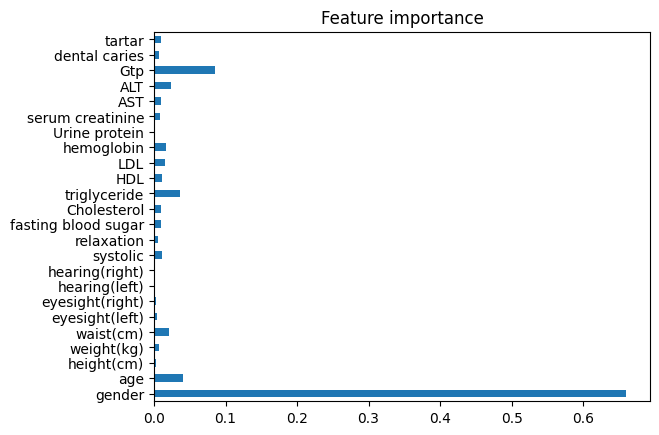

In [58]:
pd.Series(estimator.best_estimator_.feature_importances_, index=X.columns).plot.barh()
plt.title("Feature importance")
plt.show()

Kao sto mozemo da vidimo, ubedljivo najveci znacaj prilikom formiranja stabla imao je pol. Zatim Gtp, godine i trigleciridi.
Atributi hearing(right), hearing(left)i urine proteine nisu imali nikako uticaja. Zanemarljivo malo uticaja su imali i atributi height(cm), eyesight(left), eyesight(right) i relaxation.

Ocekivala sam da ce dental caries imati veci uticaj na klasifikaciju. :)


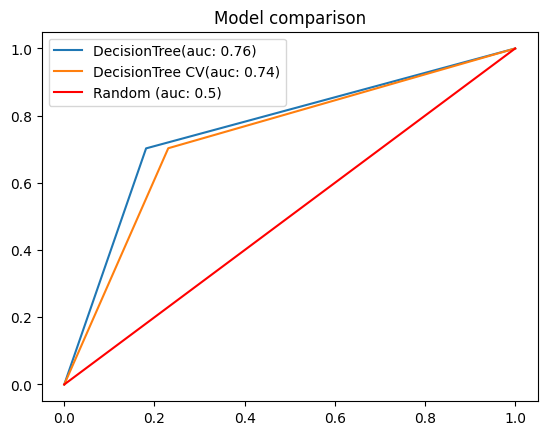

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

models = [dtc, estimator.best_estimator_]
model_names = ['DecisionTree', 'DecisionTree CV']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Model comparison")
plt.legend()
plt.show()


In [60]:
from joblib import dump
dump(estimator, 'stabla.joblib')

['stabla.joblib']